In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import glob
import os
if os.name == 'nt':
    font_family = "Malgun Gothic"
else:
    font_family = "AppleGothic"
    
# -값이 깨지는 문제 해결을 위해 파라미터값 설정    
sns.set(font=font_family, rc = {"axes.unicode_minus" : False})

In [2]:
os.listdir('../data/문화기반/')

['공공도서관_2011_2021.xlsx',
 '도서관+현황_2011_2021.xlsx',
 '문화공간(공연장)_2011_2021.xlsx',
 '문화공간(문화보급전수시설)_2011_2021.xlsx',
 '문화공간(영화관)_2011_2021.xlsx',
 '문화공간(전시시설)_2011_2021_미술관박물관.xlsx',
 '문화공간(지역문화복지시설)_20221124091542.xlsx',
 '문화공연+및+전시회_2011_2020.xlsx',
 '문화예술_및_스포츠관람현황_시도__2011_2021.xlsx',
 '문화재(2008년+이후)_2011_2021.xlsx',
 '언론매체(2009년+이후)_2011_2020.xlsx',
 '인구+10만명당+공연횟수_2011_2020.xlsx',
 '인구_십만명당_문화기반시설수_시도_시_군_구__2011_2020.xlsx',
 '지정등록문화재현황_시도__2011_2021.xlsx',
 '한강공원+이용객+현황_2013_2021.xlsx']

# 문화기반
## 공공도서관

In [3]:
path = '../data/문화기반/'

In [4]:
file = pd.read_excel(path + '공공도서관_2011_2021.xlsx')

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [5]:
file.columns

Index(['자치구별(1)', '시점', '항목', '개소 (개)', '좌석수 (개)', '자료수 (권)', '자료수 (권).1',
       '자료수 (권).2', '도서관 방문자수 (명)', '자료실 이용자수 (명)', '연간대출 책수 (권)', '직원수 (명)',
       '직원수 (명).1', '직원수 (명).2', '예산 (백만원)'],
      dtype='object')

In [6]:
file = file.astype({'시점' : str})

In [7]:
file_total = file[(file['항목'] == '계') | (file['항목'] == '항목')]

In [8]:
file_total

# 개소(개) 

# 자료수 (권) (도서)
# 자료수 (권).1 (비도서)
# 자료수 (권).2 (연속간행물(종))
#

,자치구별(1),시점,항목,개소 (개),좌석수 (개),자료수 (권),자료수 (권).1,자료수 (권).2,도서관 방문자수 (명),자료실 이용자수 (명),연간대출 책수 (권),직원수 (명),직원수 (명).1,직원수 (명).2,예산 (백만원)
0,자치구별(1),시점,항목,소계,소계,도서,비도서,연속간행물(종),소계,소계,소계,소계,남자,여자,소계
1,합계,2011,계,109.0,36629.0,8910508.0,404998.0,23447.0,57095987.0,42552573.0,21517570.0,1567.0,519.0,1048.0,76070.0
2,합계,2012,계,116.0,38594.0,9754776.0,437061.0,24276.0,60377702.0,41676378.0,21445003.0,1866.0,620.0,1246.0,82249.0
3,합계,2013,계,123.0,41703.0,10693144.0,430180.0,24956.0,64286726.0,47072804.0,22206149.0,1804.0,521.0,1283.0,88070.0
4,합계,2014,계,132.0,42194.0,11213319.0,655378.0,24833.0,71043565.0,46143554.0,27006534.0,2082.0,648.0,1434.0,87555.0
8,합계,2015,계,146.0,43227.0,11929816.0,498842.0,24967.0,71050641.0,48719001.0,24411227.0,2192.0,675.0,1517.0,111811.0
12,합계,2016,계,147.0,42926.0,12583120.0,515455.0,24633.0,68247780.0,50698340.0,23033500.0,2281.0,663.0,1618.0,125674.0
16,합계,2017,계,160.0,45057.0,13484498.0,550179.0,25734.0,64248566.0,48554365.0,22662045.0,2449.0,697.0,1752.0,163396.0
20,합계,2018,계,173.0,45536.0,14275332.0,570524.0,24867.0,66955435.0,51070334.0,23124976.0,2600.0,734.0,1866.0,150596.0
24,합계,2019,계,180.0,46253.0,14994954.0,571760.0,23807.0,66928125.0,49968428.0,24193256.0,2779.0,772.0,2007.0,161401.0


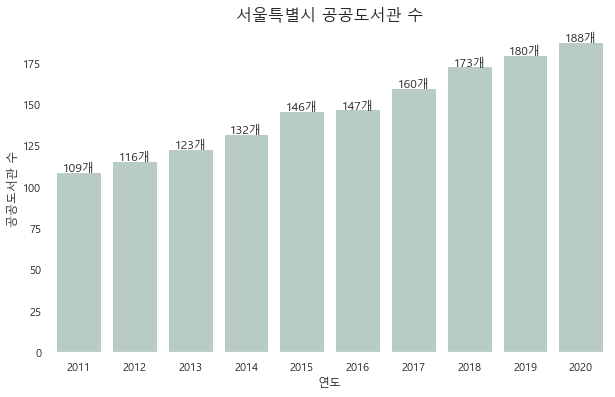

In [10]:
# file.info()
fig, ax = plt.subplots(figsize = (10,6))

year = file_total.loc[1:28, '시점']

ax.set_facecolor('white')

ax = sns.barplot(x = year, y = file_total.loc[1:28, '개소 (개)'], color = '#b6cec7')
for i, v in enumerate(file_total.loc[1:28, '개소 (개)']):
    plt.text(i, v, format(int(v), ',') + '개', ha='center')

ax.set_ylabel('공공도서관 수', fontsize = 12)
ax.set_xlabel('연도', fontsize = 12)
ax.set_title('서울특별시 공공도서관 수', fontsize = 16)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13316\3713840923.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([format(int(val), ',') for val in w])


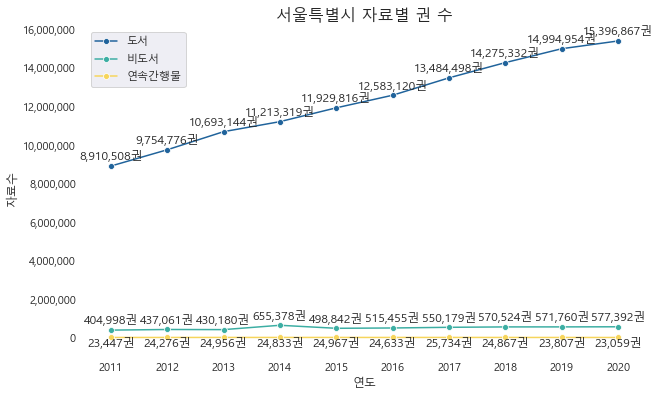

In [14]:
fig, ax = plt.subplots(figsize = (10,6))

year = file_total.loc[1:28, '시점']

ax.set_facecolor('white')

ax = sns.lineplot(x = year, y = file_total.loc[1:28, '자료수 (권)'], color = '#20639b', label = '도서', marker= 'o') # 도서
for i, v in enumerate(file_total.loc[1:28, '자료수 (권)']):
    plt.text(i, v+300000, format(int(v), ',') + '권', ha='center')
    
ax = sns.lineplot(x = year, y = file_total.loc[1:28, '자료수 (권).1'], color = '#3caea3', label = '비도서', marker= 'o') # 비도서
for i, v in enumerate(file_total.loc[1:28, '자료수 (권).1']):
    plt.text(i, v+300000, format(int(v), ',')+ '권' , ha='center')
    
ax = sns.lineplot(x = year, y = file_total.loc[1:28, '자료수 (권).2'], color = '#f6d55c', label = '연속간행물', marker= 'o') # 연속간행물
for i, v in enumerate(file_total.loc[1:28, '자료수 (권).2']):
    plt.text(i, v-500000, format(int(v), ',')+ '권' , ha='center')


w = ax.get_yticks()
ax.set_yticklabels([format(int(val), ',') for val in w])
    
ax.set_ylabel('자료수', fontsize = 12)
ax.set_xlabel('연도', fontsize = 12)
ax.set_title('서울특별시 자료별 권 수', fontsize = 16)
plt.show()

## 도서관 현황

In [15]:
file = pd.read_excel(path + '도서관+현황_2011_2021.xlsx')

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [16]:
file.columns = file.loc[0, :]

In [17]:
file.drop(0, axis = 0, inplace=True)
file.reset_index(drop=True, inplace=True)
file

,자치구별(1),시점,국립도서관,공공도서관,대학도서관,전문도서관
0,합계,2011,3.0,109.0,85.0,275.0
1,합계,2012,3.0,116.0,85.0,275.0
2,합계,2013,3.0,123.0,88.0,274.0
3,합계,2014,3.0,132.0,88.0,268.0
4,합계,2015,3.0,146.0,88.0,262.0
5,합계,2016,3.0,147.0,89.0,264.0
6,합계,2017,3.0,160.0,88.0,261.0
7,합계,2018,3.0,173.0,88.0,261.0
8,합계,2019,3.0,180.0,88.0,258.0
9,합계,2020,3.0,188.0,88.0,263.0


In [18]:
library = list(file.columns[2::])
library

year = file.loc[:10, '시점']

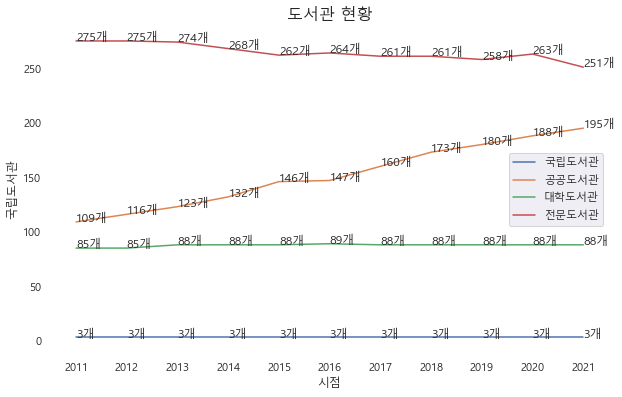

In [20]:
fig, ax = plt.subplots(figsize = (10,6))

ax.set_facecolor('white')

for l in library:
    ax = sns.lineplot(x = year, y = file.loc[:, l], label =l)
    for i, v in enumerate(file.loc[:, l]):
        plt.text(i,v,str(int(v)) + '개')

ax.legend()
ax.set_title('도서관 현황', fontsize = 16)
plt.show()

## 문화공간
### 공연장
 '문화공간(공연장)_2011_2021.xlsx',
 '문화공간(문화보급전수시설)_2011_2021.xlsx',
 '문화공간(영화관)_2011_2021.xlsx',
 '문화공간(전시시설)_2011_2021_미술관박물관.xlsx',
 '문화공간(지역문화복지시설)_20221124091542.xlsx'

In [22]:
file = pd.read_excel(path + '문화공간(공연장)_2011_2021.xlsx')
file = file.replace({'-' : np.nan})
file.columns = file.loc[0, :]
file.drop(0, axis = 0, inplace=True)
file.reset_index(drop=True, inplace =True)

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [23]:
file
year = file.loc[:, '시점']

file_ = file.iloc[:, [1,3,4,5,6,7]]
file_

,시점,공공공연장,민간공연장,대공연장(1000석 이상),일반공연장(300~999석),소공연장(300석 미만)
0,2011,87.0,170.0,18.0,93.0,146.0
1,2012,87.0,198.0,19.0,101.0,165.0
2,2013,88.0,216.0,19.0,104.0,181.0
3,2014,NaN,NaN,19.0,109.0,216.0
4,2015,NaN,NaN,18.0,112.0,251.0
5,2016,86.0,303.0,22.0,111.0,256.0
6,2017,86.0,311.0,21.0,112.0,264.0
7,2018,90.0,318.0,20.0,108.0,280.0
8,2019,95.0,317.0,19.0,113.0,280.0
9,2020,103.0,314.0,18.0,101.0,298.0


Text(0.5, 1.0, '문화공연 중 공연장')

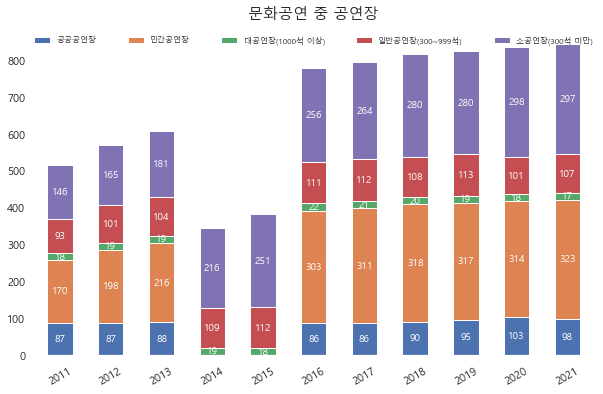

In [25]:
# fig, ax = plt.subplots(figsize = (8,6))

ax = file_.plot.bar(align='center', stacked=True, figsize = (10,6))
ax.set_facecolor('white')
ax.set_xticklabels(year, rotation = 30)

legend = plt.legend(loc='center',
       frameon=False,
       bbox_to_anchor=(0., 1.02, 1., -0.11), 
       mode='expand', 
       ncol=5, 
       borderaxespad=-.46,
       prop={'size': 8, 'family':font_family})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height !=0:
        ax.text(x+width/2, 
                y+height/2, 
                '{:.0f}'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center',
                color='white',
                fontsize=10)

plt.title('문화공연 중 공연장', fontsize =15, pad =10)
# plt.annotate("2014, 2015년 \n공공공연장 및 민간공연장 NULL값 ",(-0.5,780))

### 영화관

In [26]:
file = pd.read_excel(path + '문화공간(영화관)_2011_2021.xlsx')

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [27]:
file = file.astype({'시점' : str})

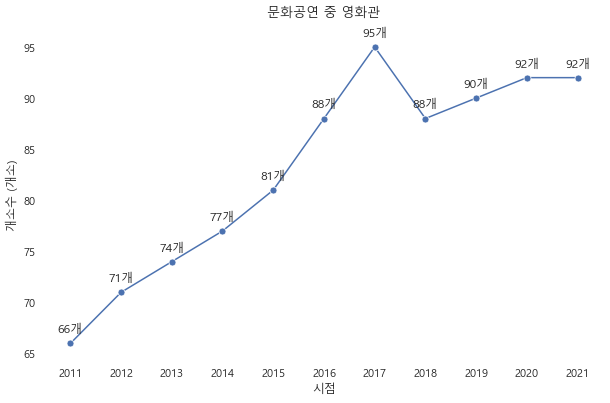

In [28]:
fig ,ax = plt.subplots(figsize = (10,6))

ax.set_facecolor('white')
ax = sns.lineplot(x = '시점', y='개소수 (개소)', data=file, marker = 'o', markersize = 7)

for i, v in enumerate(file['개소수 (개소)']):
    plt.text(i, v+1, str(int(v)) + '개', ha= 'center')
    
plt.title('문화공연 중 영화관', fontsize =13, pad =15)
plt.show()

### 전시시설 (미술관, 박물관)

In [29]:
file = pd.read_excel(path + '문화공간(전시시설)_2011_2021_미술관박물관.xlsx')

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [30]:
file = file.astype({'시점' : str})

Text(0.5, 1.0, '문화공연 중 공연장')

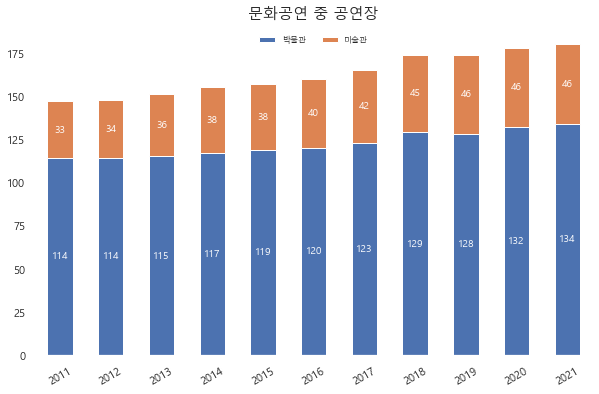

In [31]:
ax = file.plot.bar(align='center', stacked=True, figsize = (10,6))
ax.set_facecolor('white')
ax.set_xticklabels(file['시점'], rotation = 30)

legend = plt.legend(loc='center',
       frameon=False,
       bbox_to_anchor=(0., 1.02, 1., -0.11), 
#        mode='expand', 
       ncol=5, 
       borderaxespad=-.46,
       prop={'size': 8, 'family':font_family})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white',
            fontsize=10)

plt.title('문화공연 중 공연장', fontsize =15, pad =10)

### 문화공간 - 문화보급전수시설

In [26]:
file = pd.read_excel(path + '문화공간(문화보급전수시설)_2011_2021.xlsx')

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [27]:
file # 10년과 크게 다르지 않음

,자치구별(1),시점,문화원,국악원,전수회관
0,합계,2011,25.0,2.0,4.0
1,합계,2012,25.0,2.0,4.0
2,합계,2013,25.0,2.0,4.0
3,합계,2014,25.0,2.0,4.0
4,합계,2015,25.0,2.0,4.0
5,합계,2016,25.0,3.0,4.0
6,합계,2017,25.0,3.0,4.0
7,합계,2018,25.0,3.0,4.0
8,합계,2019,25.0,3.0,4.0
9,합계,2020,25.0,3.0,4.0


### 문화공간 - 지역문화복지시설

In [32]:
file = pd.read_excel(path + '문화공간(지역문화복지시설)_20221124091542.xlsx')

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [33]:
file = file.astype({'시점' : str})

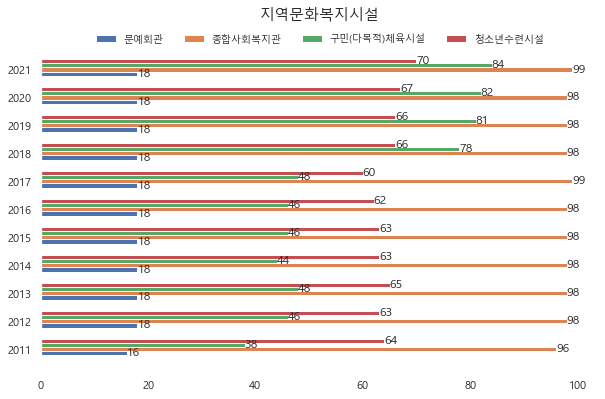

In [34]:
file
fig, ax = plt.subplots(figsize = (10,6))
ax.set_facecolor('white')
barwidth = 0.15
val = 0.1
x = np.arange(len(file))


# for i, label in enumerate(file.columns[2:]):
#     ax = plt.bar(x +i*barwidth, file.loc[:, label], barwidth, label = label)
#     for j,v in enumerate(file.loc[:, label]):
# #         print(j + i*barwidth)
#         plt.text(j + i*val, v+1, str(int(v)), rotation = 90)

for i, label in enumerate(file.columns[2:]):
    ax = plt.barh(x +i*barwidth, file.loc[:, label], barwidth, label = label)
    for j,v in enumerate(file.loc[:, label]):
#         print(j + i*barwidth)
        plt.text( v, j + i*barwidth, str(int(v)),va = 'center')
legend = plt.legend(loc='center',
       frameon=False,
       bbox_to_anchor=(0., 1.02, 1., -0.01), 
#        mode='expand', 
       ncol=4, 
       borderaxespad=-.46,
       prop={'size': 10, 'family':font_family})
plt.yticks(x+1*barwidth, file['시점'])
plt.title('지역문화복지시설', fontsize = 15,pad =25)
plt.show()
# plt.title('지역문화복지시설', fontsize = 15)

## 문화공연 및 전시회

In [35]:
file = pd.read_excel(path +'문화공연+및+전시회_2011_2020.xlsx') # 단위 (건)

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [36]:
file
total = file.iloc[[0], 3:]
exhibition = file.iloc[1:3, 1:]
show = file.iloc[3:, 1:]

In [37]:
total

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,12541.0,12007.0,11928.0,13581.0,12465.0,12350.0,13217.0,14093.0,13863.0,5539.0


In [38]:
exhibition

,분류별(2),분류별(3),2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,미술전시회,소계,7268.0,7102.0,6824.0,7533.0,-,-,-,-,-,-
2,시각예술전시,소계,-,-,-,-,5516.0,5697.0,6199.0,6312.0,6268.0,2110.0


In [39]:
show

,분류별(2),분류별(3),2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
3,공연예술,소계,-,-,-,-,6949.0,6653.0,7018.0,7781.0,7595.0,3429.0
4,공연예술,국악,667.0,733.0,505.0,636.0,502.0,411.0,619.0,751.0,662.0,184.0
5,공연예술,양악,-,-,-,-,3821.0,3568.0,3571.0,4101.0,3779.0,1842.0
6,공연예술,음악,3037.0,2702.0,2846.0,3672.0,-,-,-,-,-,-
7,공연예술,무용,540.0,648.0,721.0,528.0,537.0,527.0,507.0,479.0,544.0,173.0
8,공연예술,연극,1029.0,822.0,1032.0,1212.0,1635.0,1615.0,1667.0,1777.0,1835.0,1042.0
9,공연예술,혼합,-,-,-,-,454.0,532.0,654.0,673.0,775.0,188.0


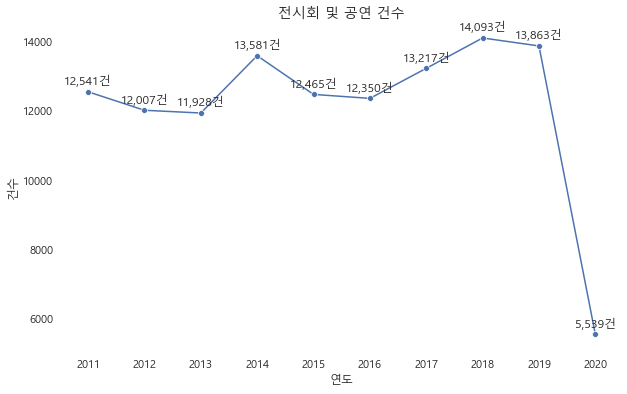

In [44]:
# 전시회와 공연은 데이터가 없는 해가 있어서 total 로 그래프를 그림
fig, ax = plt.subplots(figsize = (10,6))
ax.set_facecolor('white')

ax = sns.lineplot(x = total.columns, y = total.loc[0, :], marker = 'o')
for i, v in enumerate(total.loc[0, :]):
    plt.text(i, v+200, format(int(v), ',') + '건', ha='center')

ax.set_title('전시회 및 공연 건수', fontsize = 14)
ax.set_xlabel('연도', fontsize = 12)
ax.set_ylabel('건수', fontsize = 12)

plt.show()

## 문화예술 및 스포츠관람

In [45]:
file = pd.read_excel(path +'문화예술_및_스포츠관람현황_시도__2011_2021.xlsx')
# 설문조사 - 가중치를 위한 표본의 수가 없음

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [46]:
total = file[file['특성별(2)'] =='계']
total.columns

Index(['행정구역별(1)', '시점', '특성별(1)', '특성별(2)', '계 (%)', '관람함 (%)',
       '관람횟수(평균) (회)', '- 음악·연주회 (%)', '· 관람 횟수(평균) (회)', '- 연극·마당극·뮤지컬 (%)',
       '· 관람 횟수(평균) (회).1', '- 무용 (%)', '· 관람 횟수(평균) (회).2', '- 영화 (%)',
       '· 관람 횟수(평균) (회).3', '- 박물관 관람 (%)', '· 관람 횟수(평균) (회).4',
       '- 미술관 관람 (%)', '· 관람 횟수(평균) (회).5', '- 스포츠 관람 (%)',
       '· 관람 횟수(평균) (회).6', '- 기타 (%)', '· 관람 횟수(평균) (회).7'],
      dtype='object')

## 문화재

In [47]:
file = pd.read_excel(path + '문화재(2008년+이후)_2011_2021.xlsx')

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [48]:
# file

In [49]:
file # 소계
file.loc[0, :].unique()

array(['자치구별(1)', '시점', '소계', '지정문화재', '등록문화재'], dtype=object)

In [50]:
# 지정문화재
col_1 = [col for col in file.columns if file.loc[0, col] == '지정문화재']

In [51]:
file_1 = file.loc[:, ['시점']+col_1]
# 국가지정문화재 0 
# 시지정문화재 9 
# 문화재자료 -1

file_1 = file_1.iloc[:, [0,1, 10, -1]]
file_1.columns = file_1.iloc[1, :]
file_1.drop([0,1,2], axis=0, inplace=True)
file_1.reset_index(drop=True, inplace=True)
file_1

1,시점,국가지정문화재,시지정문화재,문화재자료
0,2011,859.0,394.0,48.0
1,2012,874.0,411.0,53.0
2,2013,909.0,428.0,51.0
3,2014,914.0,451.0,57.0
4,2015,932.0,458.0,58.0
5,2016,999.0,478.0,61.0
6,2017,1013.0,499.0,63.0
7,2018,1033.0,515.0,68.0
8,2019,1042.0,542.0,68.0
9,2020,1048.0,563.0,75.0


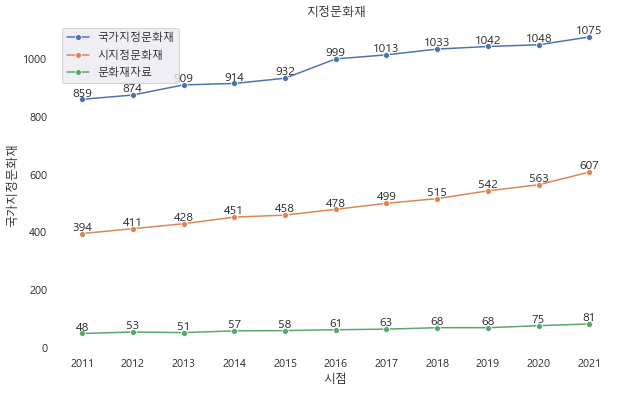

In [53]:
file_1 = file_1.astype({'시점' : str})

fig, ax = plt.subplots(figsize = (10,6))
ax.set_facecolor('white')

for col in file_1.columns[1:]:
    ax = sns.lineplot(x = '시점', y=col, data=file_1, label = col, marker='o', markersize = 6)
    for i, v in enumerate(file_1.loc[:,col]):
        plt.text(i,v+10,str(int(v)), ha='center')
ax.legend()
plt.title('지정문화재', fontsize= 12)
plt.show()

In [77]:
# 등록문화재
col_2 = [col for col in file.columns if file.loc[0, col] == '등록문화재']

In [79]:
file.loc[:, col_2] # null 값이 많아서 그래프로 표시 고민

,문화재.16,문화재.17,문화재.18
0,등록문화재,등록문화재,등록문화재
1,소계,국가등록문화재,시등록문화재
2,소계,소계,소계
3,90.0,-,-
4,143.0,-,-
5,137.0,-,-
6,141.0,-,-
7,170.0,-,-
8,185.0,-,-
9,195.0,-,-


## 언론매체

In [54]:
file = pd.read_excel(path +'언론매체(2009년+이후)_2011_2020.xlsx')
file = file.astype({'시점' : str})
_file = file.iloc[1:,[1,2,10]]
_file

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,시점,방송사,신문사
1,2011,62.0,1194.0
2,2012,220.0,1446.0
3,2013,219.0,1483.0
4,2014,210.0,1655.0
5,2015,229.0,1974.0
6,2016,209.0,1948.0
7,2017,231.0,2102.0
8,2018,232.0,2007.0
9,2019,220.0,1946.0
10,2020,219.0,2375.0


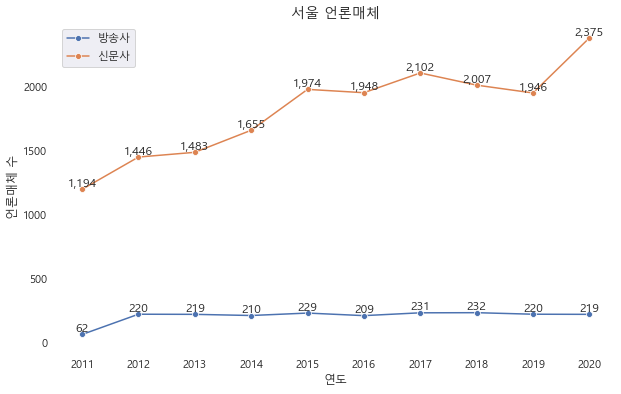

In [55]:
fig, ax = plt.subplots(figsize = (10,6))

ax.set_facecolor('white')

for col in ['방송사', '신문사']:
    ax = sns.lineplot(x = '시점', y = col, data = _file, marker= 'o', markersize = 6, label = col)
    
    for i,v in enumerate(_file[col]):
        plt.text(i, v+20, format(int(v), ','), ha='center')

plt.legend()
plt.title('서울 언론매체', fontsize = 14)
plt.xlabel('연도')
plt.ylabel('언론매체 수')
plt.show()

## 인구 10만명당 공연횟수
 '인구+10만명당+공연횟수_2011_2020.xlsx',
 '인구_십만명당_문화기반시설수_시도_시_군_구__2011_2020.xlsx',
 '지정등록문화재현황_시도__2011_2021.xlsx',
 '한강공원+이용객+현황_2013_2021.xlsx'

In [56]:
file = pd.read_excel(path + '인구+10만명당+공연횟수_2011_2020.xlsx')
file

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,구분별(1),구분별(2),구분별(3),2011,2011.1,2012,2012.1,2013,2013.1,2014,...,2016,2016.1,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1
0,구분별(1),구분별(2),구분별(3),공연횟수,10만명당 공연횟수,공연횟수,10만명당 공연횟수,공연횟수,10만명당 공연횟수,공연횟수,...,공연횟수,10만명당 공연횟수,공연횟수,10만명당 공연횟수,공연횟수,10만명당 공연횟수,공연횟수,10만명당 공연횟수,공연횟수,10만명당 공연횟수
1,계,소계,소계,55004.0,537.0,41069.0,403.0,41513.0,409.0,49898.0,...,72815.0,733.0,63363.0,643.0,70077.0,718.0,66945.0,688.0,43121.0,446.0
2,계,공연예술,국악,1673.0,16.0,1807.0,18.0,1516.0,15.0,2125.0,...,647.0,7.0,860.0,9.0,1127.0,12.0,800.0,8.0,268.0,3.0
3,계,공연예술,양악,3549.0,35.0,2984.0,29.0,3121.0,31.0,4089.0,...,3960.0,40.0,4090.0,42.0,4600.0,47.0,4234.0,44.0,2372.0,25.0
4,계,공연예술,연극,48606.0,474.0,34534.0,339.0,34772.0,343.0,42380.0,...,63524.0,640.0,53072.0,538.0,60205.0,617.0,58537.0,602.0,38140.0,395.0
5,계,공연예술,무용,1176.0,12.0,1744.0,17.0,2104.0,21.0,1304.0,...,1158.0,12.0,1332.0,14.0,1016.0,10.0,1045.0,11.0,575.0,6.0
6,계,공연예술,혼합,-,-,-,-,-,-,-,...,3526.0,36.0,4009.0,41.0,3129.0,32.0,2329.0,24.0,1766.0,18.0


In [57]:
col = [col for col in file.columns if file.loc[0, col] == '10만명당 공연횟수']

In [58]:
file = file.loc[:, ['구분별(3)']+col]
# 혼합 : 2015년부터 장르간 결합된 공연 항목도 추가됨.
file.drop(0, axis = 0, inplace=True)
file.set_index('구분별(3)', inplace=True)
file.columns = [col.split('.')[0] for col in file.columns]

In [59]:
file = file.replace({'-' : np.nan})

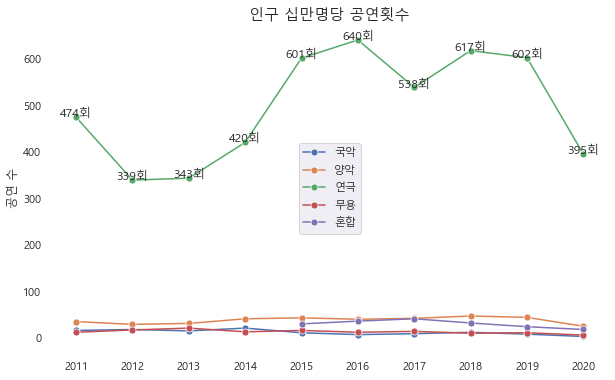

In [65]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('white')

for idx in file.index[1:]:
    ax = sns.lineplot(x = file.columns, y = file.loc[idx, :], marker= 'o', markersize =7, label = idx)
    if idx == '연극':
        for i,v in enumerate(file.loc[idx, :]):
                plt.text(i, v, str(int(v))+'회', ha = 'center')
plt.legend()
plt.ylabel('공연 수')
plt.title('인구 십만명당 공연횟수', fontsize = 15)
plt.show()

## 인구 10만명당 문화기반시설수

In [66]:
file = pd.read_excel(path + '인구_십만명당_문화기반시설수_시도_시_군_구__2011_2020.xlsx')

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [67]:
file = file[file['행정구역별'] == '서울특별시']
file = file.astype({'시점' : str})

Text(0.5, 1.0, '인구 10만명당 문화기반시설수')

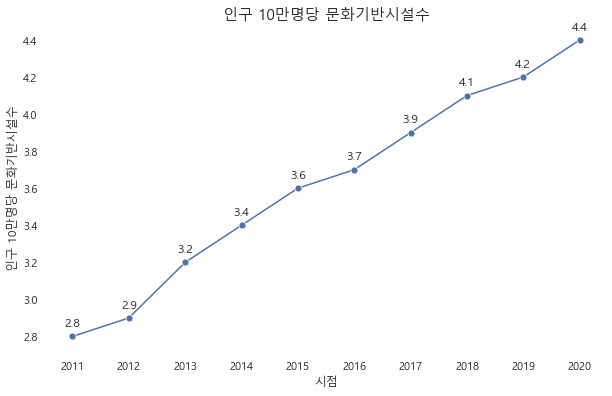

In [69]:
fig, ax = plt.subplots(figsize = (10,6))
ax.set_facecolor('white')

# ax = plt.plot(file['시점'], file['인구십만명당 문화기반시설수<br>(A÷B×100,000) (개)'])
ax = sns.lineplot(x='시점', y = '인구십만명당 문화기반시설수<br>(A÷B×100,000) (개)', data=file,
                 marker= 'o', markersize = 7)
for i, v in enumerate(file['인구십만명당 문화기반시설수<br>(A÷B×100,000) (개)']):
    plt.text(i, v+0.05, v, ha='center')
    
# ax.set_ylim(0, 5)
ax.set_ylabel('인구 10만명당 문화기반시설수')

plt.title('인구 10만명당 문화기반시설수', fontsize= 15)

## 지정문화재 등록

In [70]:
file = pd.read_excel(path + '지정등록문화재현황_시도__2011_2021.xlsx')

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [71]:
_df = file[file['행정구역별(1)'] == '서울특별시']
_df = _df.astype({'시점' : str})

In [72]:
_df

,행정구역별(1),시점,지정등록문화재<br>(A+B),지정문화재<br>(A),국가등록문화재<br>(B)
11,서울특별시,2011,1414.0,1308.0,106.0
12,서울특별시,2012,1484.0,1340.0,144.0
13,서울특별시,2013,1521.0,1355.0,166.0
14,서울특별시,2014,1582.0,1408.0,174.0
15,서울특별시,2015,1589.0,1412.0,177.0
16,서울특별시,2016,1712.0,1527.0,185.0
17,서울특별시,2017,1763.0,1565.0,198.0
18,서울특별시,2018,1808.0,1605.0,203.0
19,서울특별시,2019,1852.0,1640.0,212.0
20,서울특별시,2020,1906.0,1677.0,229.0


Text(0.5, 1.0, '지정문화재 등록')

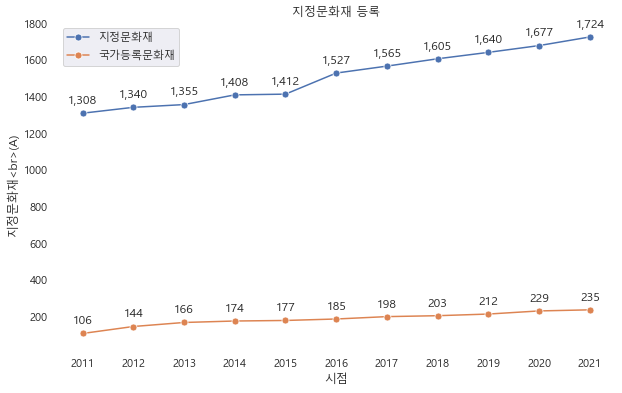

In [74]:
fig, ax = plt.subplots(figsize = (10,6))
ax.set_facecolor('white')

for col in _df.columns[3:]:
    ax = sns.lineplot(x = '시점', y = col, data = _df, label = col[:-7], 
                      marker = 'o', markersize = 7)
    for i, v in enumerate(_df[col]):
        plt.text(i, v+50, format(int(v), ','), ha='center')

plt.title('지정문화재 등록')

## 한강공원

In [76]:
file = pd.read_excel(path + '한강공원+이용객+현황_2013_2021.xlsx')

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [77]:
file
col_total = [col for col in file.columns if file.loc[1, col] == '소계']
total = file.loc[:, ['구분별(2)'] + col_total]
total.drop([0,1,2], axis = 0 , inplace =True)

In [78]:
total.set_index('구분별(2)', inplace=True)
total

,2013,2014,2015,2016,2017,2018,2019,2020,2021
구분별(2),,,,,,,,,
광나루,1551218.0,2723391.0,3384383.0,4331116.0,4850790.0,4089311.0,3174257.0,3384139.0,2989179.0
잠실,2773008.0,2647951.0,1856180.0,4342355.0,4290921.0,4057383.0,4171716.0,3798503.0,4766845.0
뚝섬,14940372.0,15068029.0,15154710.0,16311954.0,17672565.0,17288178.0,19735000.0,17472395.0,15121427.0
잠원,2299449.0,2096434.0,2927950.0,3799262.0,2968716.0,2173085.0,1601652.0,2381828.0,4957543.0
반포,2232612.0,3560263.0,5366944.0,6450021.0,5802879.0,7153087.0,7131604.0,4776082.0,3578586.0
이촌,3433783.0,4386275.0,5432314.0,4062442.0,4042584.0,3269790.0,2938996.0,2291528.0,1981496.0
여의도,29638880.0,19051193.0,18261128.0,19254678.0,25377818.0,22183377.0,21492606.0,9518870.0,11404192.0
양화,2458279.0,3851242.0,4228237.0,3614094.0,2966811.0,1770285.0,2172798.0,3647283.0,3826586.0
망원,2521539.0,3240711.0,3366382.0,3412076.0,2960460.0,3118557.0,2530934.0,2384556.0,2665604.0


C:\Users\user\AppData\Local\Temp\ipykernel_13316\1966307503.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([format(int(val), ',') for val in w])


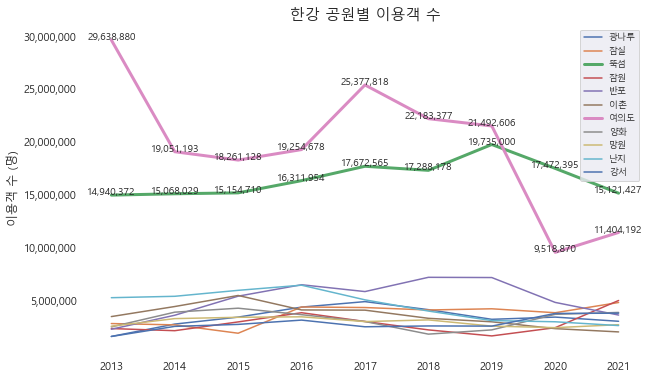

In [89]:
total
# 한강 위치별 이용객합계

fig, ax = plt.subplots(figsize = (10, 6))

ax.set_facecolor('white')
for place in total.index:
    if place in ['여의도', '뚝섬']:
        ax = sns.lineplot(x = total.columns[:], y = total.loc[place, :], label = place, linewidth = 3)
        for i, v in enumerate(total.loc[place, :]):
            plt.text(i, v, format(int(v), ','), ha='center', fontsize = 10)
    else:
        ax = sns.lineplot(x = total.columns[:], y = total.loc[place, :], label = place)

w = ax.get_yticks()
ax.set_yticklabels([format(int(val), ',') for val in w])

plt.legend(fontsize = 9)
plt.ylabel('이용객 수 (명)')
plt.title('한강 공원별 이용객 수', fontsize =15)
plt.show()